# Tu primer árbol de decisión con scikit-learn

In [1]:
#Importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt

Utilizaremos el **dataset Titanic** de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [2]:
df_titanic = pd.read_csv('titanic.csv')


In [3]:
df_titanic.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
print(df_titanic.shape)

(887, 8)


In [5]:
df_titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


## Exploración de datos

In [7]:
#Visualizacion del DataFrame
df_titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [8]:
#Eliminamos las columnas que no nos interesan
df_titanic.drop(['Name','Fare'],axis=1,inplace=True)

In [9]:
df_titanic.head(10)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,27.0,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [10]:
#Renombramos las columnas
df_titanic.columns = ['Survived','Pclass','Sex','Age','Sibsp','Parch']


In [11]:
df_titanic.head(10)

,Survived,Pclass,Sex,Age,Sibsp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,27.0,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [12]:
#Analizamos el shape del objeto
df_titanic.shape


(887, 6)

In [13]:
#Visualizamos los tipos de datos
df_titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Sibsp         int64
Parch         int64
dtype: object

In [14]:
#Cambiamos los tipos de datos
df_titanic.Sex = df_titanic.Sex.apply(lambda x:1 if x=='male' else 0)

In [15]:
df_titanic.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
Sibsp         int64
Parch         int64
dtype: object

In [16]:
df_titanic.head(10)

,Survived,Pclass,Sex,Age,Sibsp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
5,0,3,1,27.0,0,0
6,0,1,1,54.0,0,0
7,0,3,1,2.0,3,1
8,1,3,0,27.0,0,2
9,1,2,0,14.0,1,0


## Entrenamiento de árbol de decisión con scikit-learn

In [17]:
df_titanic_processed = df_titanic.copy(deep=True)
df_titanic_processed

,Survived,Pclass,Sex,Age,Sibsp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
...,...,...,...,...,...,...
882,0,2,1,27.0,0,0
883,1,1,0,19.0,0,0
884,0,3,0,7.0,1,2
885,1,1,1,26.0,0,0


In [18]:
X  = df_titanic_processed.drop(['Survived'],axis=1)
y = df_titanic_processed['Survived']



In [19]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=00000)


In [20]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2, random_state=00000)



In [21]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Evaluación del modelo

In [22]:
#Calculo de las predicciones en Train y Test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [26]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
print(f'El accuracy (exactitud) del modelo en el entrenamiento es de {accuracy_score(y_train, y_train_pred):.3f}')

#Calculo el accuracy en Test
print(f'El accuracy (exactitud) del modelo en el testeo es de {accuracy_score(y_test, y_test_pred):.3f}')

El accuracy (exactitud) del modelo en el entrenamiento es de 0.805
El accuracy (exactitud) del modelo en el testeo es de 0.764


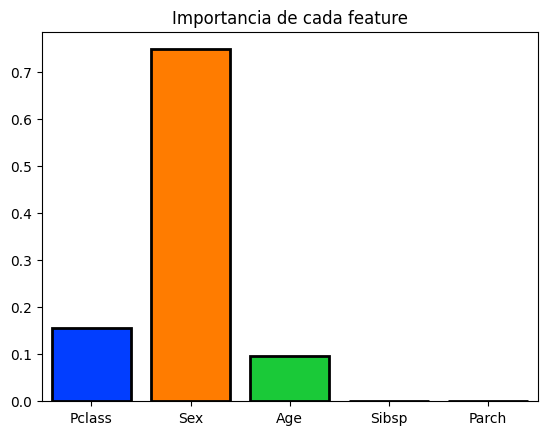

In [24]:
#Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns

data = pd.DataFrame([importances],
                    columns = columns)

sns.barplot(data,
            palette='bright',
            saturation=2.0,
            edgecolor='black',
            linewidth=2.0)
plt.title('Importancia de cada feature')
plt.show()

**¿Que podemos llevarnos de este ejemplo?**

Podemos observar que para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Pclass y luego de Age. Tambien es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo. 